### Similarity of two images based on a set of features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import skimage.measure
import copy


# %matplotlib inline

In [2]:
img = plt.imread("X.png")

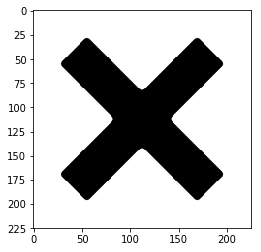

In [43]:
plt.imshow(img)

In [44]:
type(img)

numpy.ndarray

In [45]:
# img

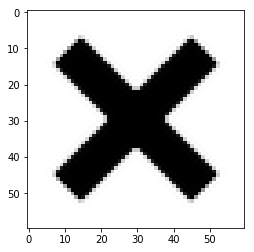

In [46]:
fname = 'X.png'
image = Image.open(fname).convert("L")
image = image.resize((60,60),Image.ANTIALIAS)
arr = np.asarray(image)
plt.imshow(arr, cmap='gray')
plt.show()

In [47]:
arr[20][15]

3

In [48]:
arr_u = []
for i in range(0,len(arr)):
    arr_l = []
    for j in range(0,len(arr)):
        if arr[i][j] == 255:
            arr_l.append(-1)
        else:
            arr_l.append(1)
    
    arr_u.append(arr_l)
        

## Max pooling

In [49]:
max_pool_1 = skimage.measure.block_reduce(np.array(arr_u), (5,5), np.max)
max_pool_1.shape

(12, 12)

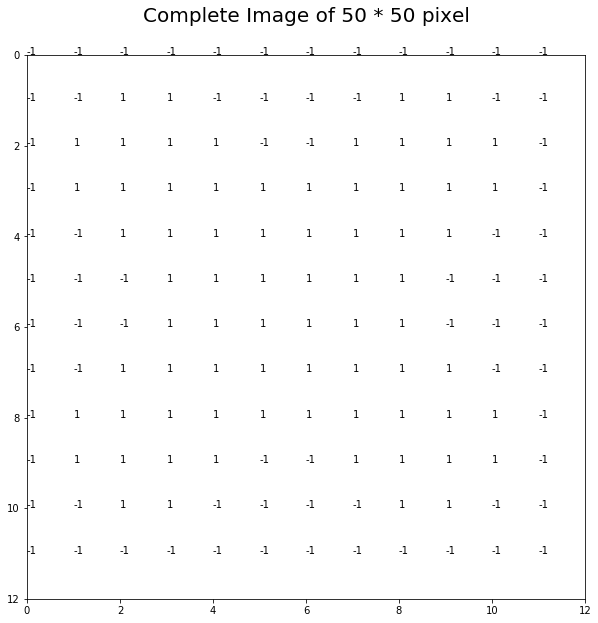

In [50]:
plt.xlim(0,len(max_pool_1))
plt.ylim(len(max_pool_1),0)
plt.title("Complete Image of 50 * 50 pixel", y = 1.05, fontsize = 20)
for i in range(0,len(max_pool_1)):
    for j in range(0,len(max_pool_1)):
        plt.text(j,i,str(max_pool_1[i][j]))
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()       

### Features from images 

In [51]:
feature_1 = [[-1,1,1,-1],[1,1,1,1],[1,1,1,1],[-1,1,1,1]]
feature_2 = [[-1,1,1,-1],[1,1,1,1],[1,1,1,1],[1,1,1,-1]]
feature_3 = [[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]
feature_4 = [[-1,1,1,1],[1,1,1,1],[1,1,1,1],[-1,1,1,-1]]
feature_5 = [[1,1,1,-1],[1,1,1,1],[1,1,1,1],[-1,1,1,-1]]
feature_6 = [[-1,-1,-1,-1],[1,-1,-1,1],[1,1,1,1],[1,1,1,1]]
feature_7 = [[1,1,1,-1],[1,1,-1,-1],[1,1,-1,-1],[1,1,1,-1]]
feature_8 = [[-1,1,1,1],[-1,-1,1,1],[-1,-1,1,1],[-1,1,1,1]]
feature_9 = [[1,1,1,1],[1,1,1,1],[1,-1,-1,1],[-1,-1,-1,-1]]
feature = [feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9]

In [52]:
def multiply_matrix(temp,ind):
#     print(temp)
    arr_1 = np.array(temp)
    sums= 0
    for i in range(0,len(temp)):
        for j in range(0,len(temp)):
            sums += temp[i][j] * feature[ind][i][j]  
    return sums

### Function to match feature matrix

In [53]:
new_len = len(max_pool_1)-len(feature_1)
final_arr_1 = np.zeros((new_len,new_len),dtype=float)
final_arr_2 = np.zeros((new_len,new_len),dtype=float)
final_arr_3 = np.zeros((new_len,new_len),dtype=float)
final_arr_4 = np.zeros((new_len,new_len),dtype=float)
final_arr_5 = np.zeros((new_len,new_len),dtype=float)
final_arr_6 = np.zeros((new_len,new_len),dtype=float)
final_arr_7 = np.zeros((new_len,new_len),dtype=float)
final_arr_8 = np.zeros((new_len,new_len),dtype=float)
final_arr_9 = np.zeros((new_len,new_len),dtype=float)
final_arr = [final_arr_1,final_arr_2,final_arr_3,final_arr_4,final_arr_5]
a = 0
for k in range(0,len(max_pool_1)-len(feature_1)):
    b = 0
    for l in range(0,len(max_pool_1)-len(feature_1)):
        temp= []        
        for i in range(k,k+4):
            temp_1 = []
            for j in range(l,l+4):                
                temp_1.append(max_pool_1[i][j])                
            temp.append(temp_1)
        for ind in range(0,5):    
            sums = multiply_matrix(temp, ind)
            result = sums / len(temp) ** 2
            final_arr[ind][a][b] = result
        b += 1
    a += 1
print(final_arr_3)   

[[ 0.     0.25   0.125 -0.125 -0.25  -0.125  0.125  0.25 ]
 [ 0.25   0.625  0.625  0.375  0.25   0.375  0.625  0.625]
 [ 0.125  0.625  0.75   0.75   0.75   0.75   0.75   0.625]
 [-0.125  0.375  0.75   1.     1.     1.     0.75   0.375]
 [-0.25   0.25   0.75   1.     1.     1.     0.75   0.25 ]
 [-0.125  0.375  0.75   1.     1.     1.     0.75   0.375]
 [ 0.125  0.625  0.75   0.75   0.75   0.75   0.75   0.625]
 [ 0.25   0.625  0.625  0.375  0.25   0.375  0.625  0.625]]


#### Relu

In [54]:
final_arr_1[final_arr_1 < 0] = 0
final_arr_2[final_arr_2 < 0] = 0
final_arr_3[final_arr_3 < 0] = 0
final_arr_4[final_arr_4 < 0] = 0
final_arr_5[final_arr_5 < 0] = 0
final_arr_6[final_arr_6 < 0] = 0
final_arr_7[final_arr_7 < 0] = 0
final_arr_8[final_arr_8 < 0] = 0
final_arr_9[final_arr_9 < 0] = 0

### Max pool 2

In [55]:
final_arr_1 = skimage.measure.block_reduce(final_arr_1, (4,4), np.max)
final_arr_2 = skimage.measure.block_reduce(final_arr_2, (4,4), np.max)
final_arr_3 = skimage.measure.block_reduce(final_arr_3, (4,4), np.max)
final_arr_4 = skimage.measure.block_reduce(final_arr_4, (4,4), np.max)
final_arr_5 = skimage.measure.block_reduce(final_arr_5, (4,4), np.max)
final_arr_6 = skimage.measure.block_reduce(final_arr_6, (4,4), np.max)
final_arr_7 = skimage.measure.block_reduce(final_arr_7, (4,4), np.max)
final_arr_8 = skimage.measure.block_reduce(final_arr_8, (4,4), np.max)
final_arr_9 = skimage.measure.block_reduce(final_arr_9, (4,4), np.max)
print(final_arr_1)

[[1.    0.75 ]
 [0.75  0.875]]


### Fully connected layer

In [56]:
final_arr_1 = final_arr_1.ravel()
final_arr_2 = final_arr_2.ravel()
final_arr_3 = final_arr_3.ravel()
final_arr_4 = final_arr_4.ravel()
final_arr_5 = final_arr_5.ravel()
final_arr_6 = final_arr_6.ravel()
final_arr_7 = final_arr_7.ravel()
final_arr_8 = final_arr_8.ravel()
final_arr_9 = final_arr_9.ravel()
print(final_arr_1)

[1.    0.75  0.75  0.875]


In [57]:
temp = np.append(final_arr_1,final_arr_2)
temp_1 = np.append(temp,final_arr_3)
temp_2 = np.append(temp_1,final_arr_4)
temp_3 = np.append(temp_2,final_arr_5)
temp_4 = np.append(temp_3,final_arr_6)
temp_5 = np.append(temp_4,final_arr_7)
temp_6 = np.append(temp_5,final_arr_8)
final_result = np.append(temp_6,final_arr_9)
print(final_result)

[1.    0.75  0.75  0.875 0.75  1.    0.875 0.75  1.    1.    1.    1.
 0.75  0.875 1.    0.75  0.875 0.75  0.75  1.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


In [58]:
# final_result
check_index = []
for i,val in enumerate(final_result):
    if val == 1:
        check_index.append(i)

check_index 
        

[0, 5, 8, 9, 10, 11, 14, 19]

## Check on any Image

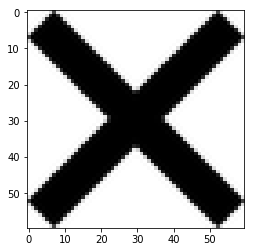

[[ 1  1  1 -1 -1 -1 -1 -1 -1  1  1  1]
 [ 1  1  1  1 -1 -1 -1 -1  1  1  1  1]
 [ 1  1  1  1  1 -1 -1  1  1  1  1  1]
 [-1  1  1  1  1  1  1  1  1  1  1 -1]
 [-1 -1  1  1  1  1  1  1  1  1 -1 -1]
 [-1 -1 -1  1  1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1  1  1 -1 -1 -1]
 [-1 -1  1  1  1  1  1  1  1  1 -1 -1]
 [-1  1  1  1  1  1  1  1  1  1  1 -1]
 [ 1  1  1  1  1 -1 -1  1  1  1  1  1]
 [ 1  1  1  1 -1 -1 -1 -1  1  1  1  1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1  1  1  1]]


In [70]:
fname = '12.png'
image = Image.open(fname).convert("L")
image = image.resize((60,60),Image.ANTIALIAS)
arr = np.asarray(image)
plt.imshow(arr, cmap='gray')
plt.show()
arr_u = []
for i in range(0,len(arr)):
    arr_l = []
    for j in range(0,len(arr)):
        if arr[i][j] == 255:
            arr_l.append(-1)
        else:
            arr_l.append(1)
    
    arr_u.append(arr_l)
    
max_pool_1 = skimage.measure.block_reduce(np.array(arr_u), (5,5), np.max)
print(max_pool_1)

In [71]:
feature_1 = [[-1,1,1,-1],[1,1,1,1],[1,1,1,1],[-1,1,1,1]]
feature_2 = [[-1,1,1,-1],[1,1,1,1],[1,1,1,1],[1,1,1,-1]]
feature_3 = [[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]
feature_4 = [[-1,1,1,1],[1,1,1,1],[1,1,1,1],[-1,1,1,-1]]
feature_5 = [[1,1,1,-1],[1,1,1,1],[1,1,1,1],[-1,1,1,-1]]
feature = [feature_1,feature_2,feature_3,feature_4,feature_5]

In [72]:
new_len = len(max_pool_1)-len(feature_1)
final_arr_1 = np.zeros((new_len,new_len),dtype=float)
final_arr_2 = np.zeros((new_len,new_len),dtype=float)
final_arr_3 = np.zeros((new_len,new_len),dtype=float)
final_arr_4 = np.zeros((new_len,new_len),dtype=float)
final_arr_5 = np.zeros((new_len,new_len),dtype=float)
final_arr = [final_arr_1,final_arr_2,final_arr_3,final_arr_4,final_arr_5]
a = 0
for k in range(0,len(max_pool_1)-len(feature_1)):
    b = 0
    for l in range(0,len(max_pool_1)-len(feature_1)):
        temp= []        
        for i in range(k,k+4):
            temp_1 = []
            for j in range(l,l+4):                
                temp_1.append(max_pool_1[i][j])                
            temp.append(temp_1)
        for ind in range(0,5):    
            sums = multiply_matrix(temp, ind)
            result = sums / len(temp) ** 2
            final_arr[ind][a][b] = result
        b += 1
    a += 1

    
final_arr_1[final_arr_1 < 0] = 0
final_arr_2[final_arr_2 < 0] = 0
final_arr_3[final_arr_3 < 0] = 0
final_arr_4[final_arr_4 < 0] = 0
final_arr_5[final_arr_5 < 0] = 0

final_arr_1 = skimage.measure.block_reduce(final_arr_1, (4,4), np.max)
final_arr_2 = skimage.measure.block_reduce(final_arr_2, (4,4), np.max)
final_arr_3 = skimage.measure.block_reduce(final_arr_3, (4,4), np.max)
final_arr_4 = skimage.measure.block_reduce(final_arr_4, (4,4), np.max)
final_arr_5 = skimage.measure.block_reduce(final_arr_5, (4,4), np.max)

final_arr_1 = final_arr_1.ravel()
final_arr_2 = final_arr_2.ravel()
final_arr_3 = final_arr_3.ravel()
final_arr_4 = final_arr_4.ravel()
final_arr_5 = final_arr_5.ravel()
temp = np.append(final_arr_1,final_arr_2)
temp_1 = np.append(temp,final_arr_3)
temp_2 = np.append(temp_1,final_arr_4)
final_result = np.append(temp_2,final_arr_5)

In [73]:
final_result

array([0.875, 0.625, 0.625, 0.875, 0.625, 0.875, 0.875, 0.625, 1.   ,
       1.   , 1.   , 1.   , 0.625, 0.875, 0.875, 0.625, 0.875, 0.625,
       0.625, 0.875])

In [74]:
total = 0
for val in check_index:
    total += final_result[val]

In [75]:
prediction = total / len(check_index)

In [76]:
print("This image has ",prediction*100," % similar feature from the above image")

This image has  93.75  % similar feature from the above image
